# Graded Challenge I
**Name** : Dafa Wiratama
**Batch** : Data Science Batch 09

# I. Introduction
> ## Objective
> - Perform exploratory data analysis on the dataset and select the best features to use for the model.
> - Create Machine Learning model to predict the `price` of cab rent with the selected features on the dataset
> - Use the model to predict the `price` of cab rent with the selected features
> - Use the model to fill the missing `price` in the dataset
> - Perform Cross Validation on the model to evaluate the performance of the model
> - Find the best model for given problem

# II. Libraries Import

In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, BayesianRidge
from sklearn.svm import LinearSVR
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import warnings

> ## Libraries Setup

In [2]:
warnings.filterwarnings("ignore")

In [3]:
tf.random.set_seed(13)
np.random.seed(13)

# III. Data Loading

In [4]:
df = pd.read_csv('rideshare_kaggle.csv')
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


# IV. Exploratory Data Analysis

In [5]:
missing_df = df[df.isna().any(axis=1)]
labeled_df = df.dropna(subset=['price'])
missing_df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
18,fa5fb705-03a0-4eb9-82d9-7fe80872f754,1.543674e+09,14,1,12,2018-12-01 14:13:04,America/New_York,North End,West End,Uber,...,0.0000,1543683600,31.71,1543658400,44.66,1543690800,28.06,1543658400,43.99,1543690800
31,eee70d94-6706-4b95-a8ce-0e34f0fa8f37,1.543795e+09,23,2,12,2018-12-02 23:52:56,America/New_York,Beacon Hill,South Station,Uber,...,0.0904,1543770000,36.45,1543726800,50.73,1543788000,35.85,1543748400,50.06,1543788000
40,7f47ff53-7cf2-4a6a-8049-83c90e042593,1.543524e+09,20,29,11,2018-11-29 20:38:05,America/New_York,North Station,Fenway,Uber,...,0.0000,1543510800,35.15,1543550400,44.66,1543510800,30.98,1543550400,38.30,1543510800
60,43abdbe4-ab9e-4f39-afdc-31cfa375dc25,1.544732e+09,20,13,12,2018-12-13 20:10:16,America/New_York,North End,West End,Uber,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
69,80db1c49-9d51-4575-a4f4-1ec23b4d3e31,1.543583e+09,13,30,11,2018-11-30 13:08:03,America/New_York,North End,Beacon Hill,Uber,...,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600


In [6]:
n_test = 64

labeled_df = labeled_df.sample(frac=1)

train_ds, val_ds = train_test_split(labeled_df[:-n_test], test_size=0.2)
test_ds = labeled_df[-n_test:]

In [7]:
_train_ds = train_ds.copy()
_train_ds = _train_ds.drop([col for col in _train_ds if 'time' in col.lower()], axis=1)
_train_ds = _train_ds.drop('id', axis=1)
_categorical_columns = [col for col in _train_ds.columns if _train_ds[col].dtype == 'object']
for col in _categorical_columns:
    _train_ds[col] = _train_ds[col].astype('category').cat.codes
_train_ds

,hour,day,month,source,destination,cab_type,product_id,name,price,distance,...,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
560730,20,27,11,7,2,0,6,5,11.0,3.16,...,0.82,0,10.000,311.4,0.68,0.1430,36.34,47.11,32.26,44.14
517220,6,14,12,3,0,0,10,6,16.5,1.48,...,0.77,0,9.716,299.1,0.24,0.0000,27.27,46.51,24.61,43.74
462347,6,18,12,8,11,1,5,11,11.5,2.87,...,1.00,0,5.860,362.1,0.37,0.0028,23.23,38.10,12.12,32.10
317857,4,30,11,1,6,0,11,2,16.5,1.53,...,0.00,0,10.000,291.1,0.75,0.0000,34.67,45.03,30.30,38.53
567295,0,1,12,7,9,0,10,6,13.5,2.06,...,1.00,0,9.725,288.7,0.79,0.0004,28.64,42.32,29.29,40.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122639,7,17,12,4,5,0,10,6,11.0,1.26,...,1.00,0,3.183,331.1,0.33,0.0178,34.07,41.42,28.11,35.95
494905,23,26,11,7,2,0,10,6,16.5,3.14,...,1.00,0,5.177,297.3,0.64,0.1225,40.45,46.49,37.17,43.84
313186,1,16,12,9,4,1,4,8,5.5,0.63,...,0.19,0,9.922,297.4,0.27,0.0074,39.54,54.47,36.46,53.80
237505,22,27,11,2,10,0,8,3,26.0,2.99,...,0.28,0,10.000,307.6,0.68,0.1422,35.90,46.72,31.81,43.70


In [8]:
_price_rate = _train_ds['price'] / _train_ds['distance']
_pearson = _train_ds.corrwith(_price_rate, method='pearson').abs()
_kendall = _train_ds.corrwith(_price_rate, method='kendall').abs()
_spearman = _train_ds.corrwith(_price_rate, method='spearman').abs()

pd.DataFrame({
    'pearson': _pearson,
    'kendall': _kendall,
    'spearman': _spearman,
    'summary': (_pearson + _kendall + _spearman) / 3
}).sort_values('summary', ascending=False)

,pearson,kendall,spearman,summary
distance,0.304083,0.379888,0.534667,0.406213
price,0.240472,0.396568,0.569215,0.402085
name,0.242248,0.350612,0.528191,0.373684
surge_multiplier,0.062538,0.106268,0.130605,0.099804
destination,0.065305,0.068649,0.100709,0.078221
product_id,0.007439,0.043326,0.084176,0.044981
source,0.031905,0.038566,0.058659,0.043043
cab_type,0.000364,0.039991,0.048968,0.029774
apparentTemperatureHigh,0.003796,0.002948,0.004392,0.003712
apparentTemperatureMax,0.003655,0.002902,0.004324,0.003627


In [9]:
def set_decorator(ax, title, x_label, y_label):
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

In [10]:
def numerical_analysis(_df, columns):
    if not isinstance(columns, list):
        columns = [columns]

    _df = _df.copy()
    _df['rate'] = _df['price'] / _df['distance']

    for column in columns:
        fig, ax = plt.subplots(1, 3, figsize=(8 * 3, 4))
        fig.suptitle('{} Analysis'.format(column).upper())

        ax[0].hist(_df[column], bins=64)
        set_decorator(ax[0], 'Histogram of {}'.format(column), '{}'.format(column), 'Count')

        ax[1].scatter(_df[column], _df['rate'])
        set_decorator(ax[1], '{} vs Rate'.format(column), '{}'.format(column), 'Rate')

        ax[2].scatter(_df[column], _df['price'])
        set_decorator(ax[2], '{} vs Price'.format(column), '{}'.format(column), 'Price')

In [11]:
def discrete_analysis(_df, columns):
    if not isinstance(columns, list):
        columns = [columns]

    _df = _df.copy()
    _df['rate'] = _df['price'] / _df['distance']

    for column in columns:
        fig, ax = plt.subplots(1, 3, figsize=(8 * 3, 4))
        fig.suptitle('{} Analysis'.format(column).upper())

        ax[0].hist(_df[column], bins=_df[column].nunique())
        set_decorator(ax[0], 'Histogram of {}'.format(column), '{}'.format(column), 'Count')

        bar_df = _df.groupby(column).agg({'rate': 'mean'})
        ax[1].bar(bar_df.index, bar_df['rate'])
        set_decorator(ax[1], 'Price per Distance', '{}'.format(column), 'Price per Distance')

        sns.boxplot(x=column, y='rate', data=_df, ax=ax[2])
        ax[2].set_yscale('log')
        set_decorator(ax[2], 'Distribution of {}'.format(column), '{}'.format(column), 'Price per Distance (Log)')

In [12]:
feature_columns = []


def insert_feature(column, mapper):
    feature_columns.append((column, mapper, [column]))

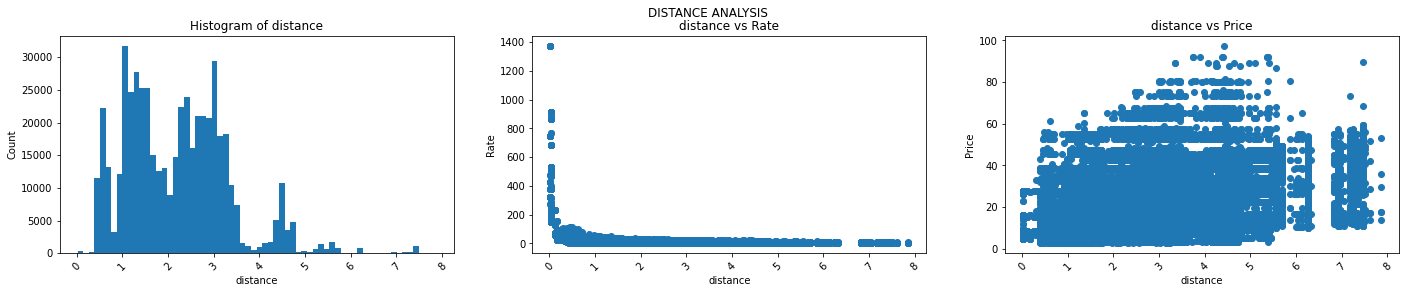

In [13]:
numerical_analysis(train_ds, 'distance')

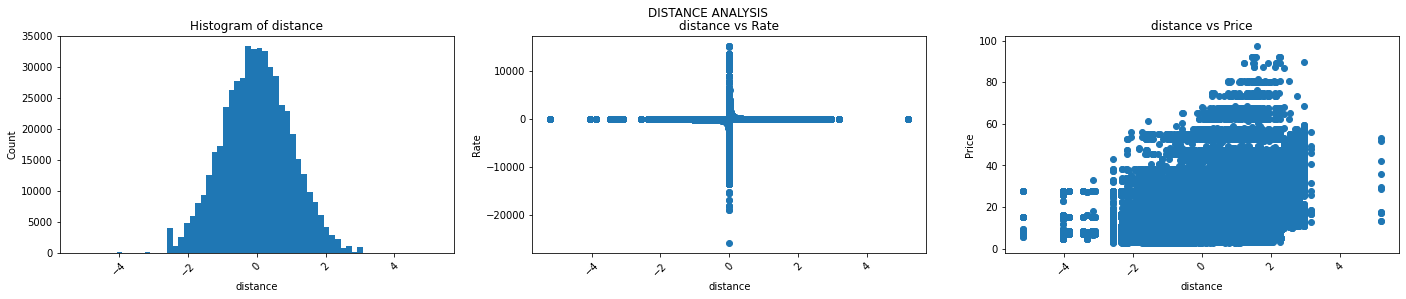

In [14]:
distance_normalizer = QuantileTransformer(output_distribution='normal')
_temp_ds = train_ds.copy()
_temp_ds['distance'] = distance_normalizer.fit_transform(_temp_ds[['distance']])
numerical_analysis(_temp_ds, 'distance')

In [15]:
insert_feature('distance', distance_normalizer)

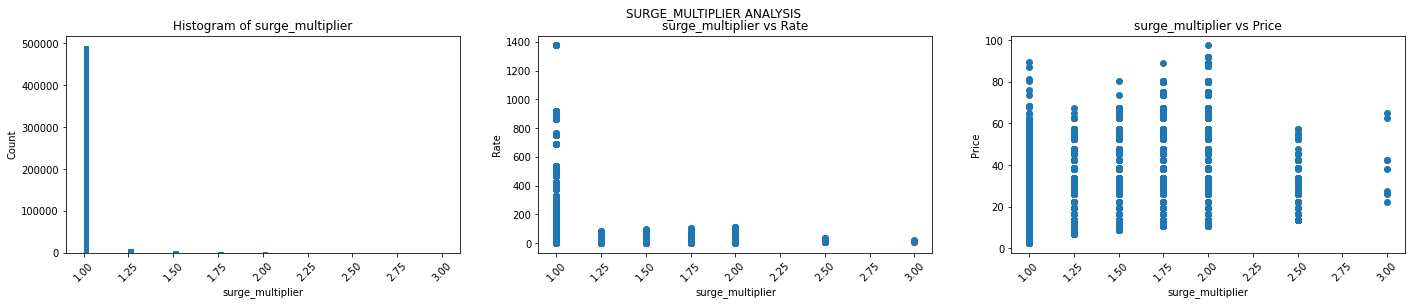

In [16]:
numerical_analysis(train_ds, 'surge_multiplier')

In [17]:
insert_feature('surge_multiplier', MinMaxScaler())

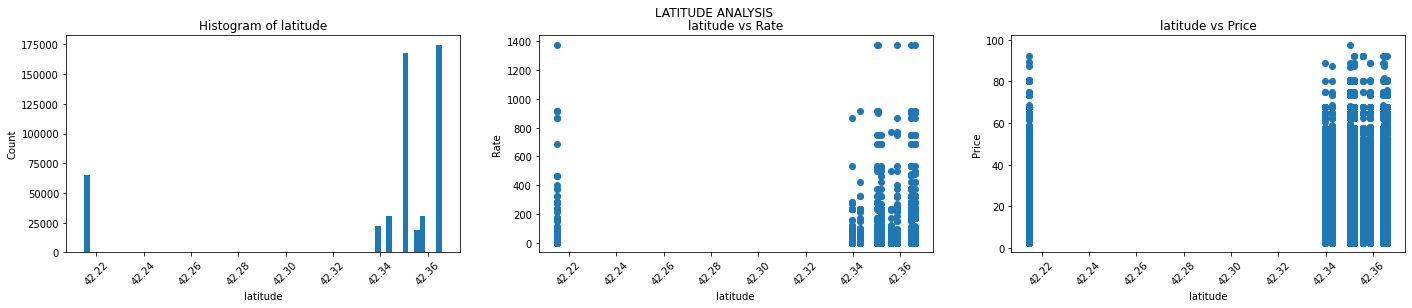

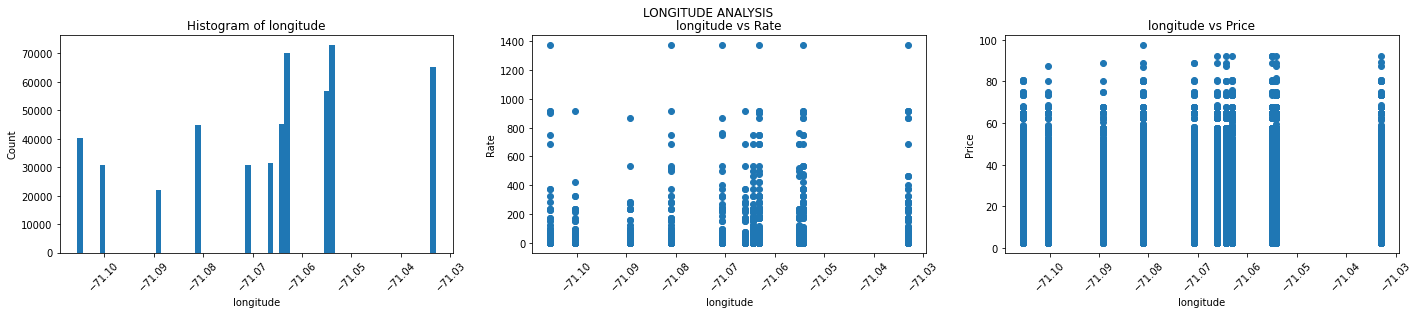

In [18]:
numerical_analysis(train_ds, ['latitude', 'longitude'])

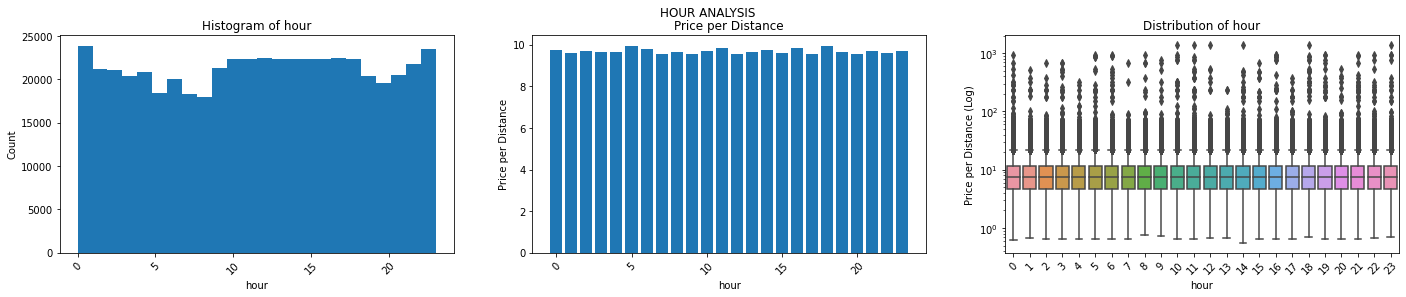

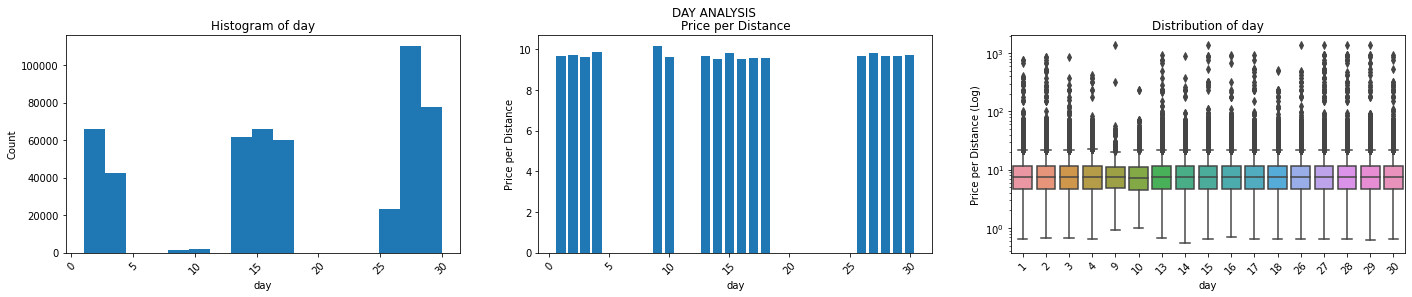

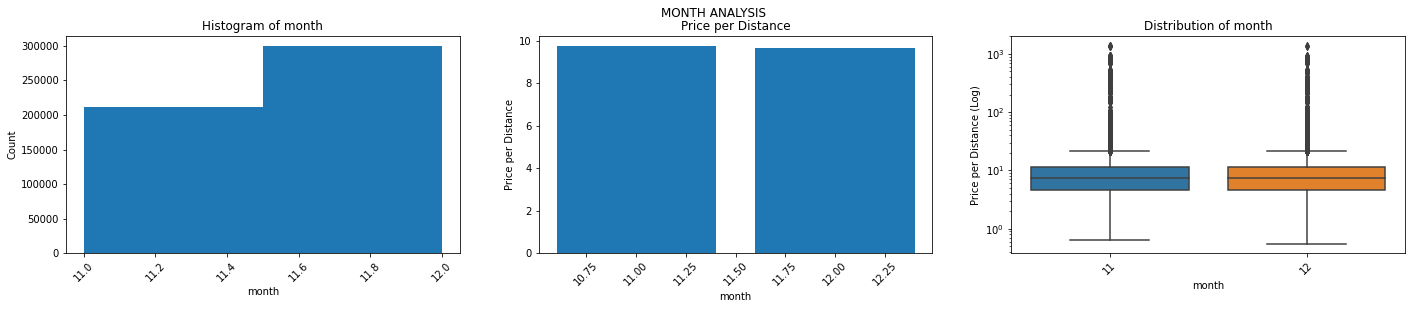

In [19]:
discrete_analysis(train_ds, ['hour', 'day', 'month'])

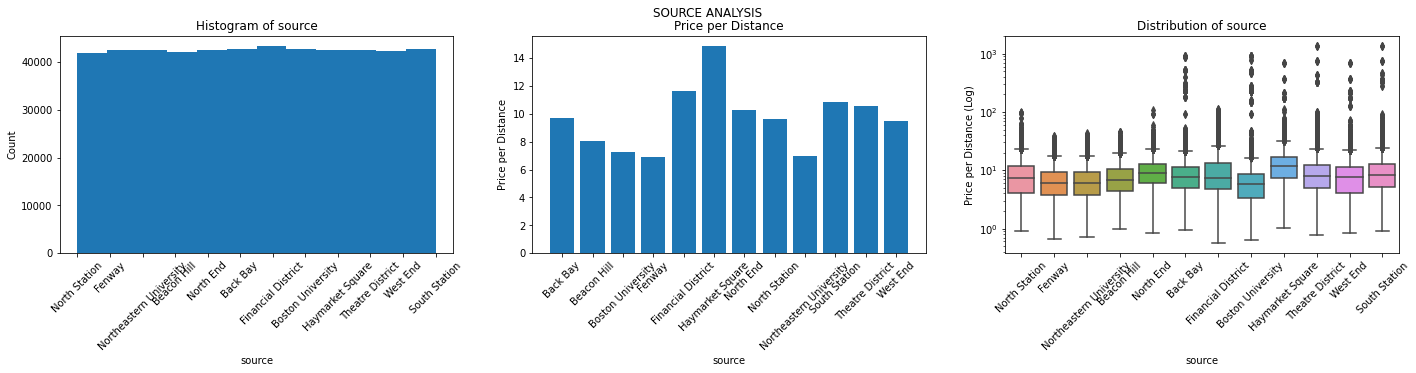

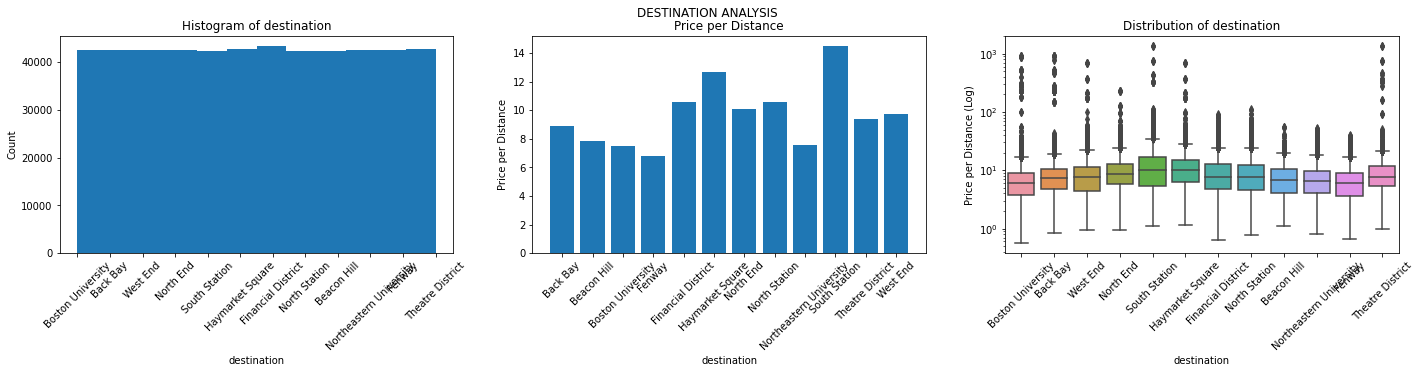

In [20]:
discrete_analysis(train_ds, ['source', 'destination'])

In [21]:
city_categories = train_ds.groupby('source').agg({'price': 'sum', 'distance': 'sum'})
city_categories = city_categories['price'] / city_categories['distance']
city_categories = city_categories.sort_values().index.values
city_categories

array(['Boston University', 'Fenway', 'Northeastern University',
       'Financial District', 'North Station', 'West End', 'Beacon Hill',
       'Back Bay', 'Theatre District', 'South Station', 'North End',
       'Haymarket Square'], dtype=object)

In [22]:
city_encoder = OrdinalEncoder(categories=[city_categories])

insert_feature('source', city_encoder)
insert_feature('destination', city_encoder)

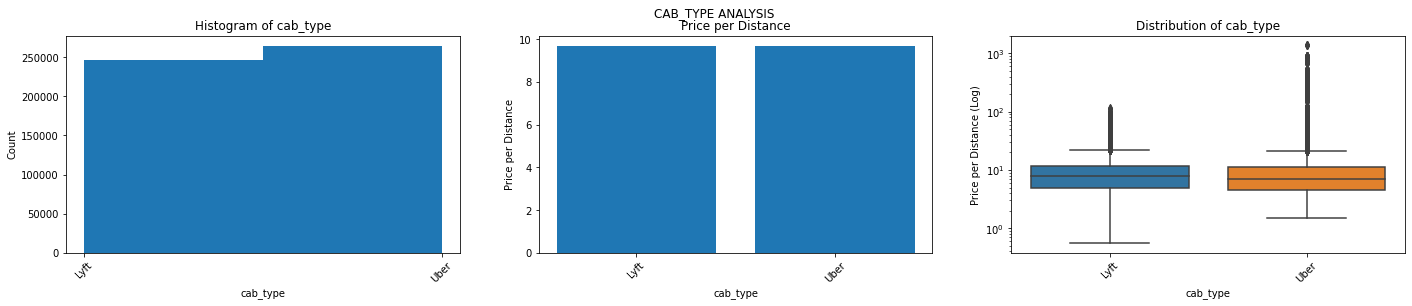

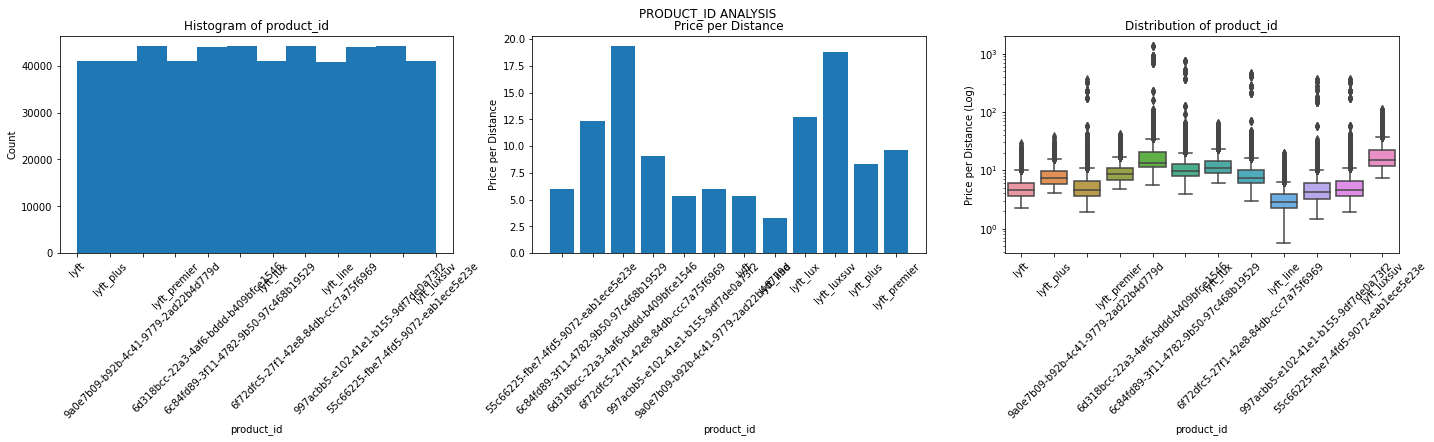

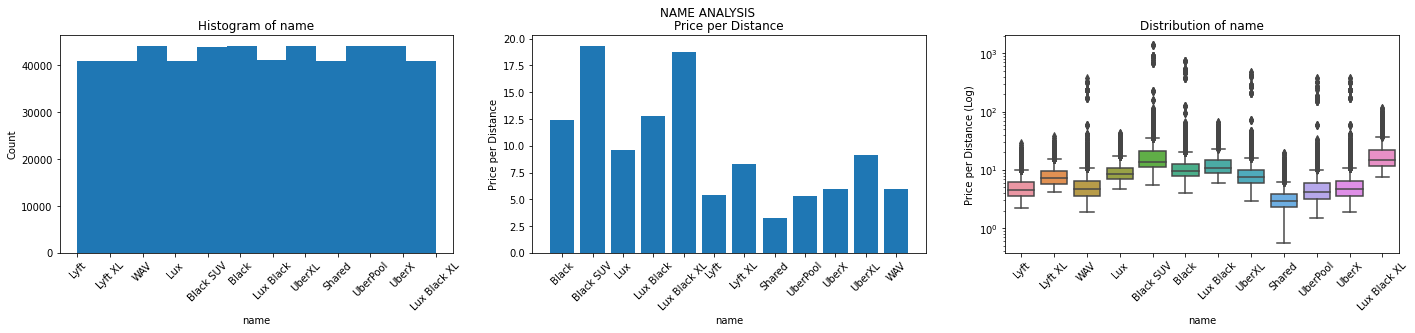

In [23]:
discrete_analysis(train_ds, ['cab_type', 'product_id', 'name'])

In [24]:
name_categories = train_ds.groupby('name').agg({'price': 'sum', 'distance': 'sum'})
name_categories = name_categories['price'] / name_categories['distance']
name_categories = name_categories.sort_values().index.values
name_categories

array(['Shared', 'UberPool', 'Lyft', 'WAV', 'UberX', 'Lyft XL', 'UberXL',
       'Lux', 'Black', 'Lux Black', 'Black SUV', 'Lux Black XL'],
      dtype=object)

In [25]:
name_encoder = OrdinalEncoder(categories=[name_categories])
insert_feature('name', name_encoder)

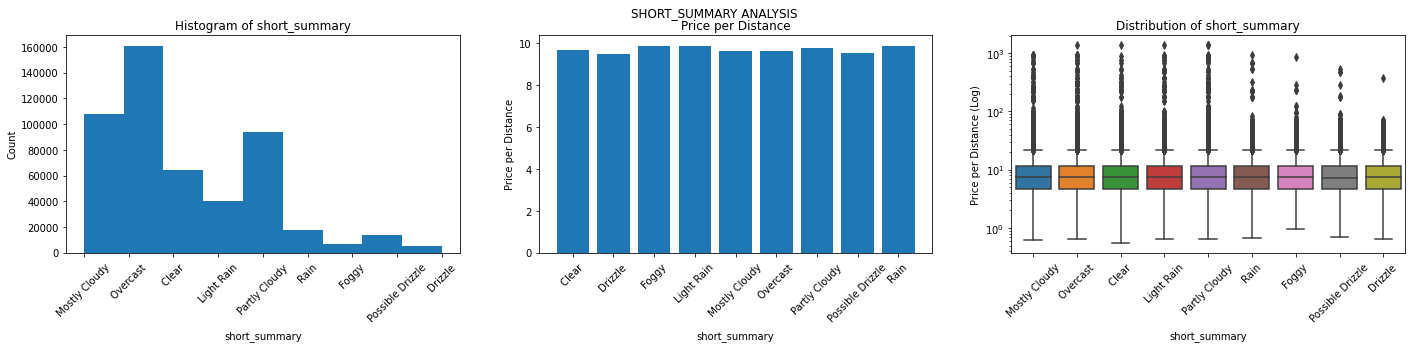

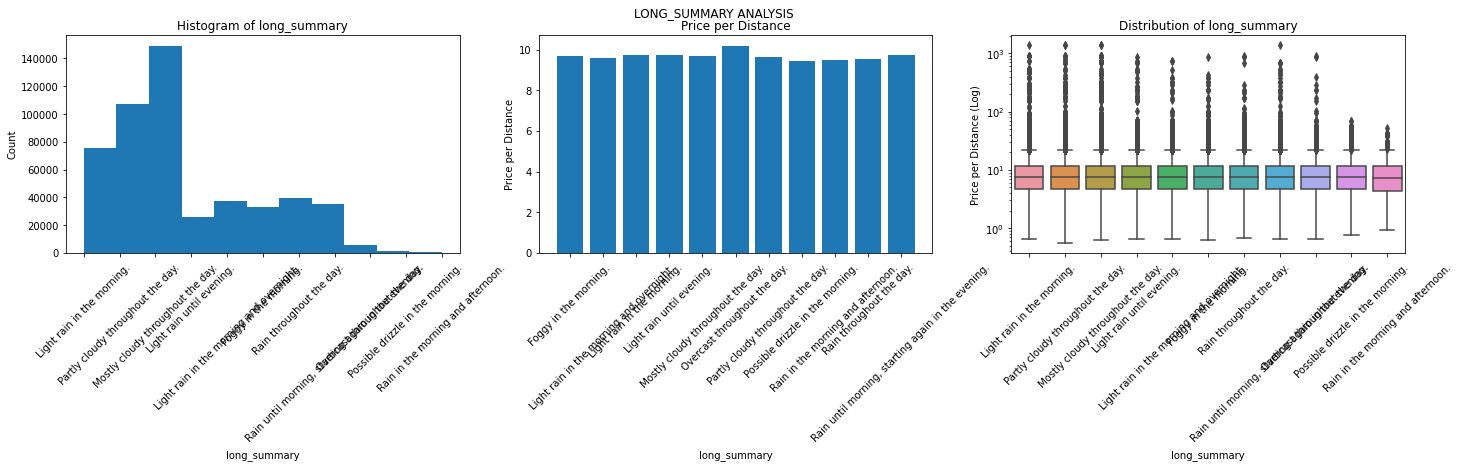

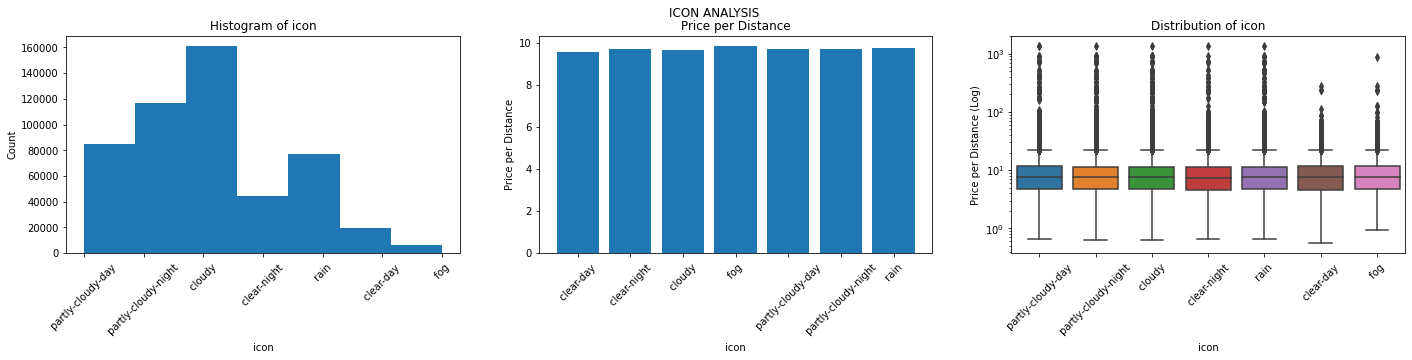

In [26]:
discrete_analysis(train_ds, ['short_summary', 'long_summary', 'icon'])

# V. Data Preprocessing

In [27]:
column_names = [column_name for (column_name, _, _) in feature_columns]
preprocessing_pipe = ColumnTransformer(feature_columns)

In [28]:
def target_splitter(_df, target, inputs=None):
    if inputs is None:
        inputs = df.columns.difference([target])
    return _df[inputs], _df[target]


train_x, train_y = target_splitter(train_ds, inputs=column_names, target='price')
val_x, val_y = target_splitter(val_ds, inputs=column_names, target='price')
test_x, test_y = target_splitter(test_ds, inputs=column_names, target='price')

# VI. Model Definition

In [41]:
create_model_pipeline = lambda model: Pipeline([('preprocessing', preprocessing_pipe), ('model', model)])

models = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), SGDRegressor(), BayesianRidge(), DecisionTreeRegressor(), LinearSVR()]
model_pipelines = [create_model_pipeline(model) for model in models]

# VII. Model Training

In [52]:
def evaluation(y, _y):
    mae = mean_absolute_error(y, _y)
    mse = mean_squared_error(y, _y)
    mape = mean_absolute_percentage_error(y, _y)
    r2 = r2_score(y, _y)
    return {'mae': mae, 'mse': mse, 'mape': mape, 'r2': r2}


reports = []

for model_pipeline in model_pipelines:
    model_name = model_pipeline.named_steps['model'].__class__.__name__
    print(f"Training {model_name}...", end='')
    model_pipeline.fit(train_x, train_y)
    _y = model_pipeline.predict(train_x)

    report = evaluation(train_y, _y)
    report['model'] = model_name
    reports.append(report)
    print(f" Done")

reports = pd.DataFrame(reports, columns=['model', 'mae', 'mse', 'mape', 'r2'])

Training LinearRegression... Done
Training Ridge... Done
Training Lasso... Done
Training ElasticNet... Done
Training SGDRegressor... Done
Training BayesianRidge... Done
Training DecisionTreeRegressor... Done
Training LinearSVR... Done


# VIII. Model Evaluation

In [53]:
reports.sort_values('mae', ascending=True).set_index('model')

,mae,mse,mape,r2
model,,,,
DecisionTreeRegressor,0.940153,2.320809,0.070887,0.973294
LinearSVR,2.671638,12.762110,0.199961,0.853146
SGDRegressor,2.695777,12.374810,0.213846,0.857603
LinearRegression,2.704525,12.076774,0.213640,0.861032
BayesianRidge,2.704922,12.078854,0.213673,0.861008
Ridge,2.706138,12.092867,0.213703,0.860847
Lasso,2.884463,16.116435,0.207194,0.814548
ElasticNet,2.945808,17.020130,0.207998,0.804149


In [45]:
reports = []

for model_pipeline in model_pipelines:
    model_name = model_pipeline.named_steps['model'].__class__.__name__
    print(f"Evaluating {model_name}...", end='')
    _y = model_pipeline.predict(test_x)
    report = evaluation(test_y, _y)
    report['model'] = model_name
    reports.append(report)
    print(f" Done")

reports = pd.DataFrame(reports, columns=['model', 'mae', 'mse', 'mape', 'r2'])
reports.sort_values('mae', ascending=True).set_index('model')

Evaluating LinearRegression... Done
Evaluating Ridge... Done
Evaluating Lasso... Done
Evaluating ElasticNet... Done
Evaluating SGDRegressor... Done
Evaluating BayesianRidge... Done
Evaluating DecisionTreeRegressor... Done
Evaluating LinearSVR... Done


,mae,mse,mape,r2
model,,,,
DecisionTreeRegressor,1.103963,2.751242,0.077809,0.965186
LinearSVR,2.918996,14.432662,0.207295,0.817368
SGDRegressor,2.929198,14.264176,0.213621,0.819500
BayesianRidge,2.958781,14.025506,0.220190,0.822520
LinearRegression,2.959701,14.020696,0.220365,0.822581
Ridge,2.959998,14.025462,0.220424,0.822521
Lasso,3.101939,15.632155,0.217810,0.802189
ElasticNet,3.154729,16.431616,0.217497,0.792073


# IX. Model Inference

In [32]:
def evaluate_result(model, x, y):
    _y = model.predict(x)
    if _y.ndim != 1:
        _y = _y.flatten()
    result = pd.DataFrame(np.array([y, _y]).T, columns=['actual', 'predicted'])
    result['error'] = np.abs(result['actual'] - result['predicted']).values
    return result

In [33]:
evaluate_result(model_pipelines[2], test_x, test_y)

,actual,predicted,error
0,13.5,17.571140,4.071140
1,16.5,21.011980,4.511980
2,42.5,32.613312,9.886688
3,9.5,14.772584,5.272584
4,16.5,19.171924,2.671924
...,...,...,...
59,8.5,7.465080,1.034920
60,19.5,22.833277,3.333277
61,12.5,15.905956,3.405956
62,26.0,28.206965,2.206965


In [34]:
evaluate_result(model_pipelines[6], test_x, test_y)

,actual,predicted,error
0,13.5,13.405882,0.094118
1,16.5,18.061644,1.561644
2,42.5,42.743902,0.243902
3,9.5,11.000000,1.500000
4,16.5,15.933962,0.566038
...,...,...,...
59,8.5,8.916667,0.416667
60,19.5,21.987805,2.487805
61,12.5,12.092460,0.407540
62,26.0,26.600000,0.600000


# X. Summary

# Exploration

In [35]:
_input = tf.keras.layers.Input(shape=[len(feature_columns)])
x = tf.keras.layers.Dense(128, activation='tanh')(_input)
x = tf.keras.layers.Dropout(0.33)(x)
x = tf.keras.layers.Dense(64, activation='tanh')(x)
output = tf.keras.layers.Dense(1)(x)

model_multi_layer_perceptron = tf.keras.models.Model(inputs=_input, outputs=output)

model_multi_layer_perceptron.compile(optimizer='adam', loss='mae', metrics=['mse'])

model_multi_layer_perceptron_pipeline = Pipeline(
    [('preprocessing', preprocessing_pipe), ('model', model_multi_layer_perceptron)])
model_multi_layer_perceptron_pipeline.fit(train_x, train_y, model__shuffle=True, model__batch_size=256,
                                          model__epochs=16)
_y = model_multi_layer_perceptron_pipeline.predict(val_x)
evaluation(val_y, _y)

Epoch 1/16
1994/1994 [==============================] - 2s 934us/step - loss: 2.5933 - mse: 19.6376
Epoch 2/16
1994/1994 [==============================] - 2s 920us/step - loss: 1.6205 - mse: 6.1967
Epoch 3/16
1994/1994 [==============================] - 2s 918us/step - loss: 1.4209 - mse: 5.0114
Epoch 4/16
1994/1994 [==============================] - 2s 975us/step - loss: 1.3318 - mse: 4.5111
Epoch 5/16
1994/1994 [==============================] - 2s 961us/step - loss: 1.2941 - mse: 4.2678
Epoch 6/16
1994/1994 [==============================] - 2s 936us/step - loss: 1.2747 - mse: 4.1288
Epoch 7/16
1994/1994 [==============================] - 2s 1ms/step - loss: 1.2609 - mse: 4.0146
Epoch 8/16
1994/1994 [==============================] - 2s 1ms/step - loss: 1.2474 - mse: 3.9344
Epoch 9/16
1994/1994 [==============================] - 2s 968us/step - loss: 1.2401 - mse: 3.8806
Epoch 10/16
1994/1994 [==============================] - 2s 985us/step - loss: 1.2307 - mse: 3.8389
Epoch 11/16


{'mae': 1.1550814924690627,
 'mse': 3.490124478408207,
 'mape': 0.08429846647569471,
 'r2': 0.9599332125801792}

In [36]:
evaluate_result(model_multi_layer_perceptron_pipeline, test_x, test_y)

,actual,predicted,error
0,13.5,13.199907,0.300093
1,16.5,18.492067,1.992067
2,42.5,42.434006,0.065994
3,9.5,10.786628,1.286628
4,16.5,14.985581,1.514419
...,...,...,...
59,8.5,8.912408,0.412408
60,19.5,23.020109,3.520109
61,12.5,11.721427,0.778573
62,26.0,27.368942,1.368942


In [37]:
def evaluate_input_sensitivity(model, _df):
    base = {'surge_multiplier': 1., 'source': 'Financial District', 'destination': 'Back Bay'}
    _df = _df[(df['surge_multiplier'] == 1) & (_df['source'] == 'Financial District') & (
            _df['destination'] == 'Northeastern University')]

    rows = []
    for name in _df['name'].unique():
        for distance in np.linspace(_df['distance'].min(), _df['distance'].max(), 100):
            row = base.copy()
            row['distance'] = distance
            row['name'] = name
            rows.append(row)
    latent_inputs = pd.DataFrame(rows)
    latent_inputs['price'] = model.predict(latent_inputs)

    plt.figure(figsize=(8 * 3, 8))
    plt.title('Input Distance Sensitivity')
    plt.xlabel('Distance')
    plt.ylabel('Price')

    for name in _df['name'].unique():
        plt.plot(latent_inputs[latent_inputs['name'] == name]['distance'],
                 latent_inputs[latent_inputs['name'] == name]['price'], label=f"Prediction {name}")
        plt.scatter(_df[df['name'] == name]['distance'], _df[df['name'] == name]['price'], label=f"Actual {name}",
                    marker='x')
    plt.legend()

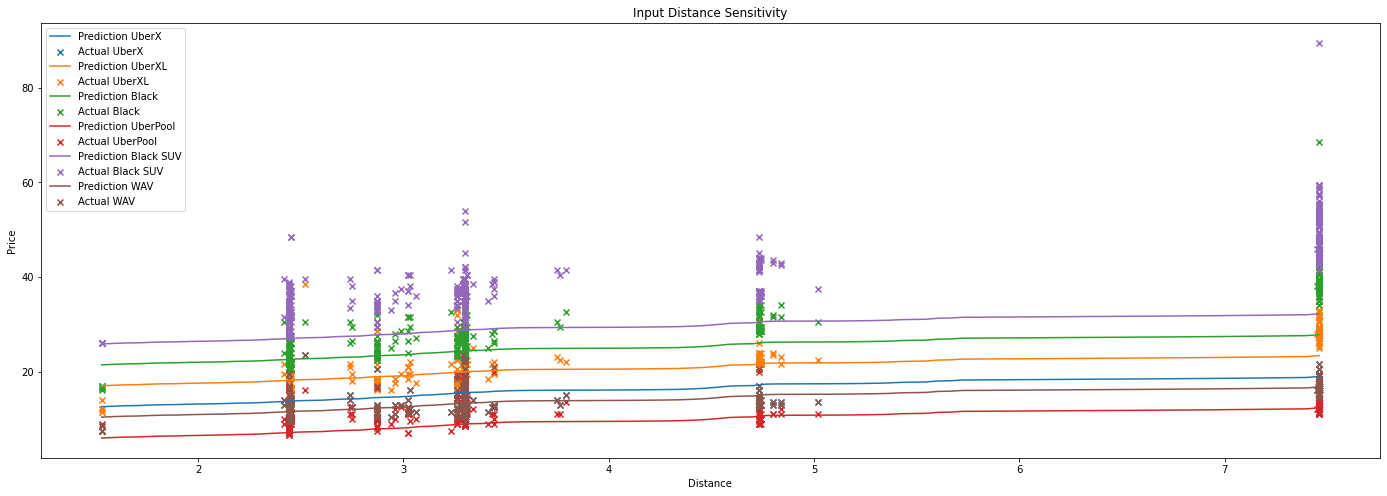

In [38]:
evaluate_input_sensitivity(model_pipelines[2], labeled_df[labeled_df['cab_type'] == 'Uber'])

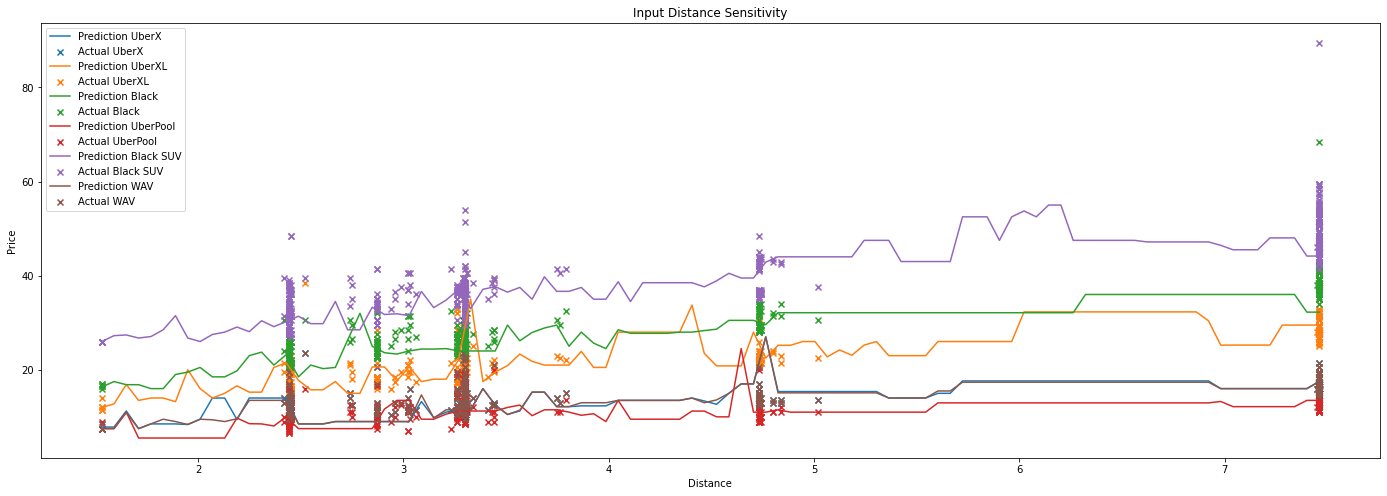

In [39]:
evaluate_input_sensitivity(model_pipelines[6], labeled_df[labeled_df['cab_type'] == 'Uber'])

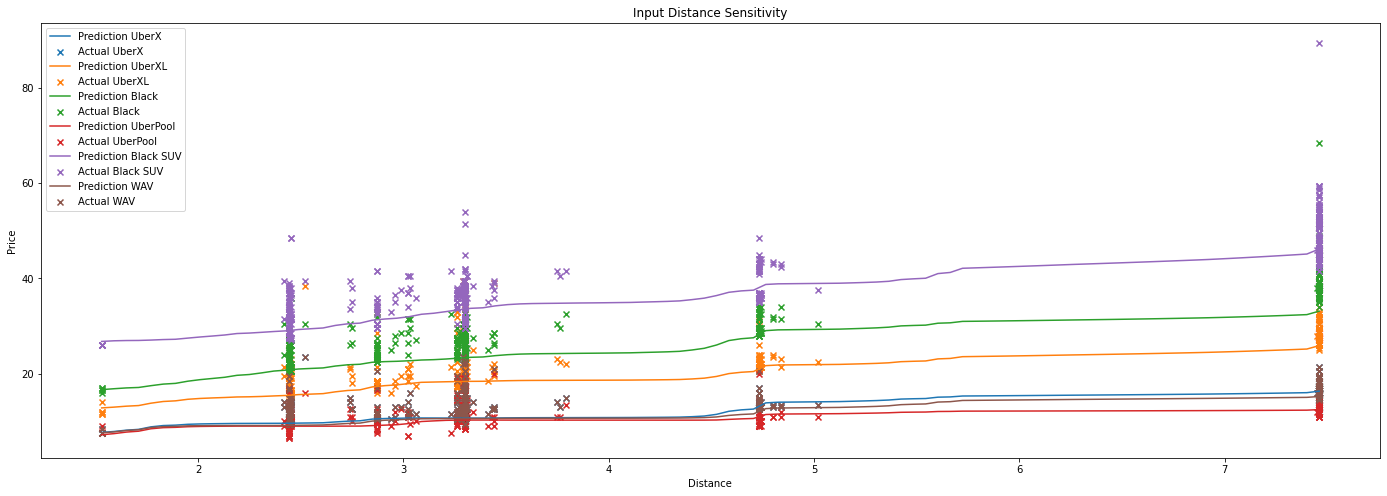

In [40]:
evaluate_input_sensitivity(model_multi_layer_perceptron_pipeline, labeled_df[labeled_df['cab_type'] == 'Uber'])